In [422]:
from AROMA import *
from AROMA.utils import *
from AROMA.config import *
import pandas as pd
from scipy.optimize import curve_fit
%matplotlib inline

pi = np.pi 

def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx
print('def: find_nearest(array, value)')

def gauss(x, u, fwhm):
    sigma = fwhm/2.355
    return 1/(sigma*np.sqrt(2*pi)) * np.exp (-(x-u)**2/(2*sigma**2))

import os
from os.path import join
array = os.path.abspath('').split('/')
homedir = '/'
for i in range(1,7):
   homedir = join(homedir, array[i])
homedir

# data_path = '~/Documents/GitHub/aroma/AROMA_An_Exo_Rot_Mapping/data/processed/luhman_16ab_sector36-37_longPeriodsRemoved.txt'
data_path = '~/Documents/GitHub/aroma/AROMA_An_Exo_Rot_Mapping/data/processed/luhman_16ab_sector36-37_longPeriodsRemoved_wd20hr.txt'

dataRaw = pd.read_csv(data_path, header=0, delimiter='\t')
plotPath = join(homedir, 'plots')

data = dataRaw # full light curve
fit_dir = join(homedir,'notebooks', 'periodSineFit_metadata')

# Constant rate sampling: sample data at every point i=rate (ie. skip 10 data point between next data)
rate=50
data.lc_smooth = data.lc_smooth.rolling(window=rate).mean()
data = data[::10]
data = data.dropna(axis=0)

time_orig, lc_orig = data.TIME, data.lc_smooth
segments = [(0, 250), (310, 570), (630, 890), (960, 1200)]
plt.close('all')

# for seg in segments:
#     plt.figure(figsize=(10,4)), plt.plot(time, lc, ls='', marker='o', ms=3.0), plt.xlim(seg)
#     plt.xlabel('Hrs'), plt.title("Box-car 20-hour window\nSegment: "+str(seg)+" hrs"), plt.ylim((0.93, 1.07))

print('Original shape: ', dataRaw['TIME'].size)  
print('Reduced shape at constant sampling rate=%i: '%rate, data['TIME'].size)     

def: find_nearest(array, value)
Original shape:  5471
Reduced shape at constant sampling rate=50:  543


### Plot the periodogram of long-periods in each segment

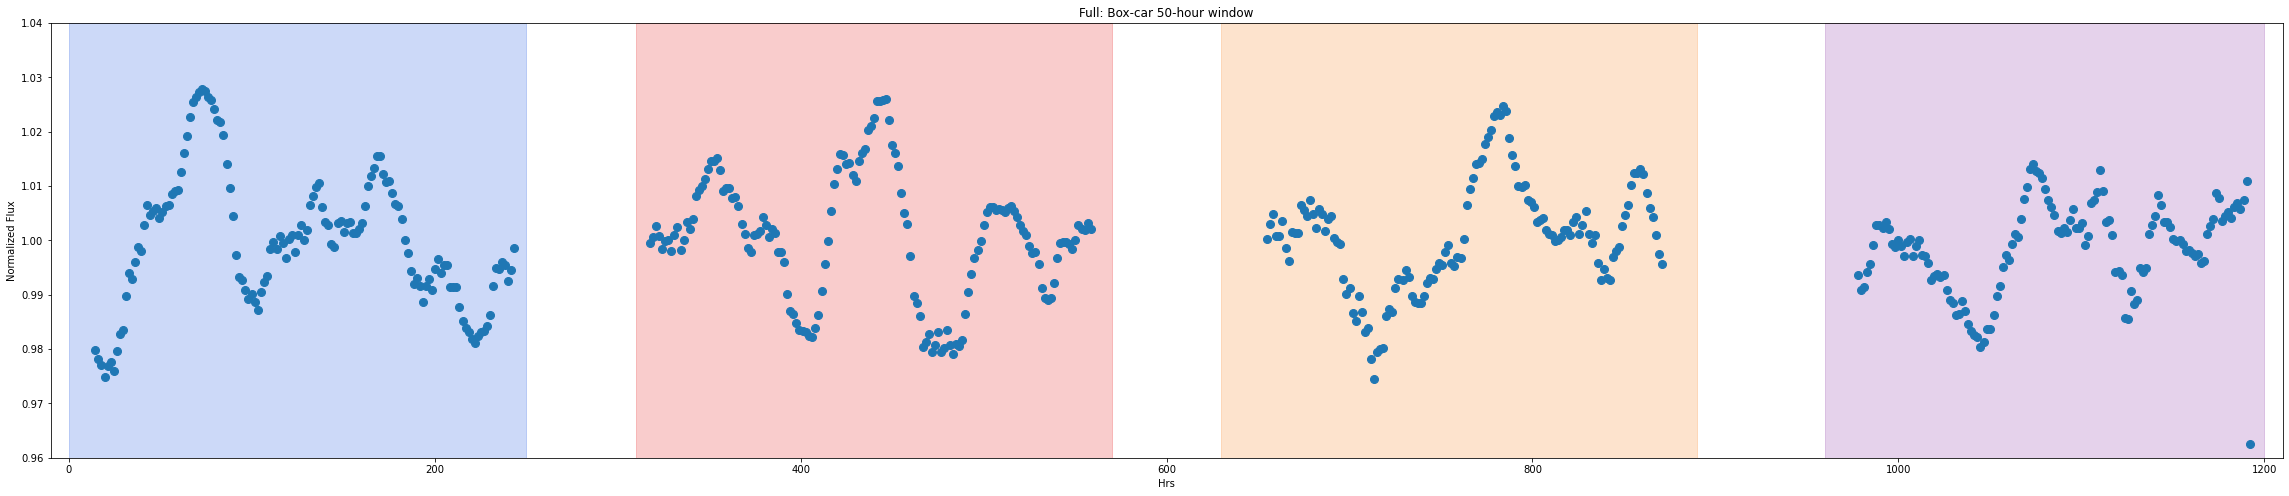

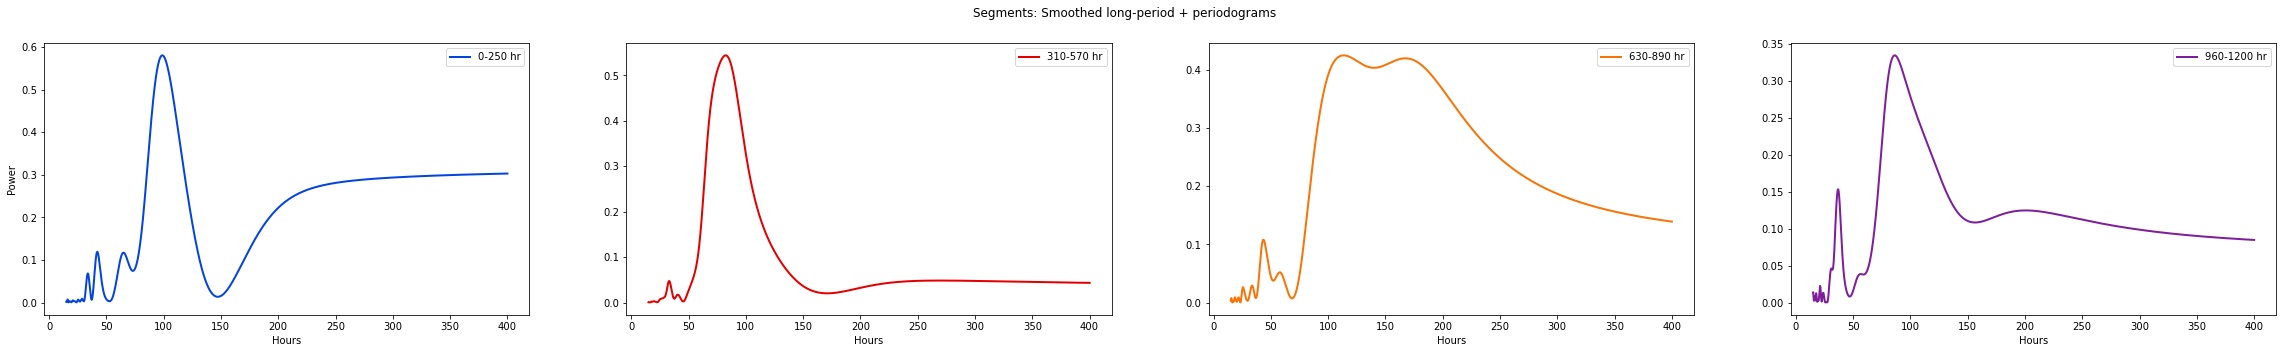

In [423]:
# %matplotlib widget
colors = ['xkcd:blue', 'xkcd:red', 'xkcd:orange', 'xkcd:purple']
f, ax0 = plt.subplots(figsize=(40, 8))
ax0.plot(time_orig, lc_orig, ls='', marker='o', ms=8.0)
ax0.set_xlim((-10,1210)), ax0.set_ylim((0.96, 1.04))
ax0.set_xlabel('Hrs'), ax0.set_ylabel('Normalized Flux')
ax0.set_title("Full: Box-car %i-hour window"%(rate))

### Find periodograms for each segments
periodmax=15.
periodmin=400.
frequen = np.linspace(1/periodmax,1/periodmin,5000)

f = plt.figure(figsize=(40,5))
# plt.subplots_adjust(hspace=0.5)
plt.suptitle("Segments: Smoothed long-period + periodograms", fontsize=12)
for i, t in enumerate(segments):
    t0, t1 = t[0], t[1]
    subset = data.query('TIME >= %f & TIME < %f'%(t0, t1))
    subset.dropna
    time, lc, lc_err = subset.TIME, subset.lc_smooth, subset.lc_smooth*0.04
    clp = pyPeriod.Gls((time,lc,lc_err), norm="ZK", freq=frequen,ofac=10)
    fr, pw = clp.freq, clp.power
    hpp = 1./fr
    
    ## Plotting
    rectangle = plt.Rectangle((t0,0.96), t1-t0, 1.04-0.96, color=colors[i], alpha=0.2)
    ax0.add_patch(rectangle)
    ax = plt.subplot(1, 4, i+1)
    ax.plot(hpp,pw, c=colors[i], lw=2.0, label = '%i-%i hr'%(t0, t1))
    ax.legend()
    ax.set_xlabel('Hours')
    if i==0: ax.set_ylabel('Power')
        
### Saving
save = False
if save:
    plotOut = plotPath + '/longPeriodExplore_sector3637_periodoLC'
    f.savefig(plotOut+'.pdf', dpi=300, format='pdf', bbox_inches = 'tight')
    f.savefig(plotOut+'.png', dpi=300, format='png', bbox_inches = 'tight')

plt.show()

(-0.05, 0.05)

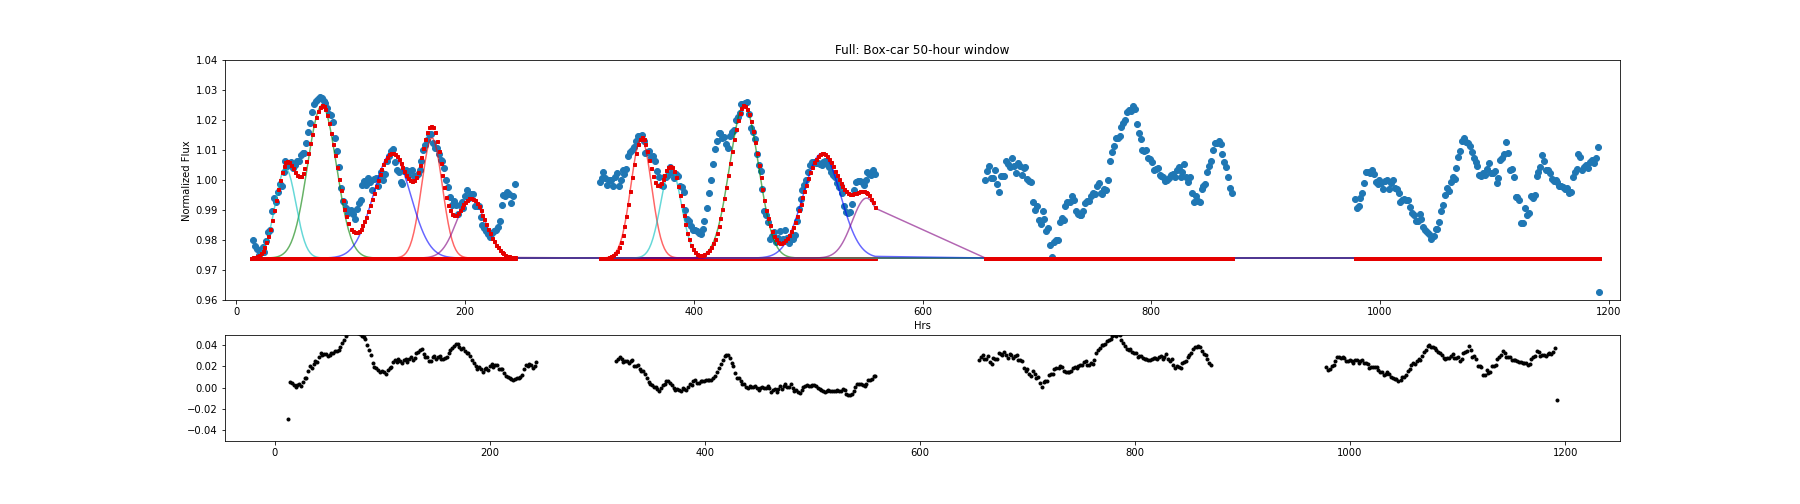

In [545]:
%matplotlib widget
f, (ax0, ax1) = plt.subplots(2, 1, figsize=(25, 7), gridspec_kw={'height_ratios': [1.8, 0.8]})
ax0.plot(time_orig, lc_orig, ls='', marker='o', ms=6.0)
ax0.set_xlim((-10,1210)), ax0.set_ylim((0.96, 1.04))
ax0.set_xlabel('Hrs'), ax0.set_ylabel('Normalized Flux')
ax0.set_title("Full: Box-car %i-hour window"%(rate))
color = ['g','r','b','c','purple']

C = 0.974* np.ones(len(time_orig))

y = []
y.append(0.051*repeat_gaussian(x=time_orig, T=5000, mu=74.8, fwhm=70)) # g
y.append(0.040*repeat_gaussian(x=time_orig, T=5000, mu=171, fwhm=50))  # r 
y.append(0.035*repeat_gaussian(x=time_orig, T=5000, mu=136, fwhm=90))  # b
y.append(0.030*repeat_gaussian(x=time_orig, T=5000, mu=43, fwhm=50))   # c
y.append(0.020*repeat_gaussian(x=time_orig, T=5000, mu=205, fwhm=70))  # p
for i in range(5):
    ax0.plot(time_orig, C+y[i], alpha=0.6, c=color[i])
    
sum0 = C + y[0] + y[1] + y[2] + y[3] + y[4]
ax0.plot(time_orig, sum0, ls='', marker='s', ms=3., c='xkcd:red')

y = []
y.append(0.051*repeat_gaussian(x=time_orig, T=5000, mu=444, fwhm=70)) # g
y.append(0.040*repeat_gaussian(x=time_orig, T=5000, mu=354, fwhm=50)) # r 
y.append(0.035*repeat_gaussian(x=time_orig, T=5000, mu=512, fwhm=90)) # b
y.append(0.030*repeat_gaussian(x=time_orig, T=5000, mu=380, fwhm=50))  # c
y.append(0.020*repeat_gaussian(x=time_orig, T=5000, mu=551, fwhm=70))# p
for i in range(5):
    ax0.plot(time_orig, C+y[i], alpha=0.6, c=color[i])
    
sum0 = C + y[0] + y[1] + y[2] + y[3] + y[4]
ax0.plot(time_orig, sum0, ls='', marker='s', ms=3., c='xkcd:red')

ax1.plot(time_orig, lc_orig - sum0, ls='', marker='.', c='k')
ax1.set_ylim((-0.05, 0.05))

[0.02498763 0.0754979 ]
[ 0.02504502 -0.07537466]
[ 0.0249754  -0.02017613]
[1.25043737 2.74975191 1.25000548]
[5.02479011 2.2850008  5.02652622] hours


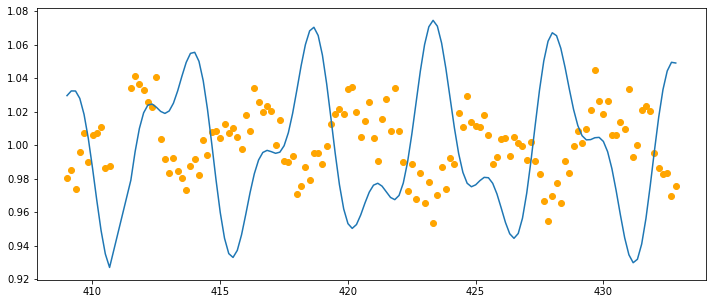

In [10]:
def altmodel(a1, f1, a2, f2, a3, f3, w1, w2, w3, t):
    model = 1+ a1*np.sin(w1*t + f1) + a2*np.sin(w2*t + f2) + a3*np.sin(w3*t + f3)
    return model

tlow, thigh = segments[0]
subset = data.query('TIME < %f & TIME >= %f'%(thigh, tlow))
time = np.array(subset.TIME)
lc = np.array(subset.lc_corrected)
lc_err = 0.05*np.array(subset.lc_corrected)
df = ((time, lc, lc_err))

# guesses = [0.005, 0.5, 0.002, -1, 0.002, 3, 1.2, 1.5, 2.1]
lim = [(0, 0.05), (-10*pi, 10*pi), 
       (0, 0.05), (-10*pi, 10*pi), 
       (0, 0.05), (-10*pi, 10*pi), 
       (1, 1.5), (2.5, 3), (1., 1.5)]

### GUESSES AND BOUNDS
# popt, pcov = curve_fit(altmodel, time, lc, p0=guesses, bounds=np.transpose(lim))
### BOUNDS ONLY
popt, pcov = curve_fit(altmodel, time, lc, bounds=np.transpose(lim))
### NONE
# popt, pcov = curve_fit(altmodel, time, lc)

a1, f1, a2, f2, a3, f3, w1, w2, w3 = popt
fit = altmodel(a1, f1, a2, f2, a3, f3, w1, w2, w3, t=time)

plt.figure(figsize=(12,5)), plt.plot(time, fit), plt.scatter(time, lc, c='orange')
print(popt[0:2])
print(popt[2:4])
print(popt[4:6])
print(popt[6:9])
print(2*pi/popt[6:9], 'hours')

### TEST FOR MODEL 2: GAUSSIAN SERIES ~5: 5 slowly-varying polar vortices

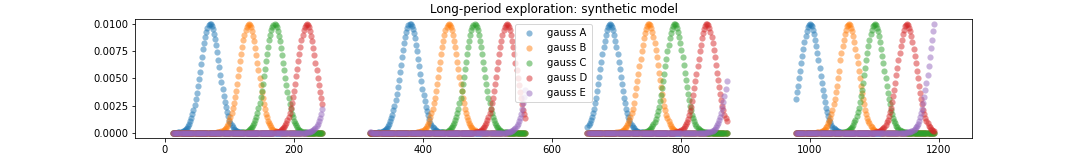

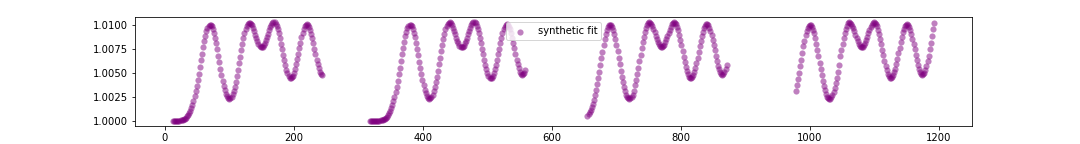

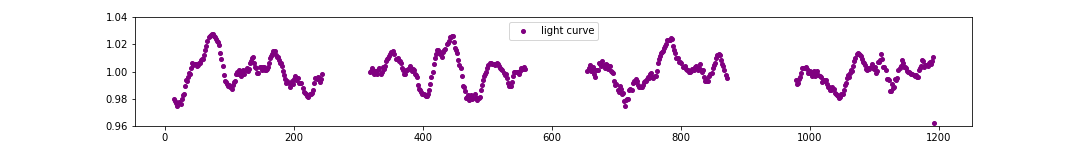

In [554]:
t0 = np.array(time_orig)
from scipy.signal import savgol_filter

def repeat_gaussian(x, T, mu, fwhm):
    sigma=fwhm/2.355
    y = np.zeros(x.shape)
    repeat = 15
    for i, val in enumerate(x):
        for c in range(repeat):
            y[i] += gauss(val, mu + c*T, sigma)
    ymax = np.max(y)
    y/=ymax
    return np.array(y)

period = 400 # hours
phase = 0.5 * pi
a = 1+0.005*np.sin((2*pi/period)*t0 + phase)
fwhm, space = 80, 310
y  = 0.01*repeat_gaussian(x=t0, T=space, mu=70, fwhm=fwhm)
y1 = 0.01*repeat_gaussian(x=t0, T=space, mu=130, fwhm=fwhm)
y2 = 0.01*repeat_gaussian(x=t0, T=space, mu=170, fwhm=fwhm)
y3 = 0.01*repeat_gaussian(x=t0, T=space, mu=220, fwhm=fwhm)
y4 = 0.01*repeat_gaussian(x=t0, T=space, mu=270, fwhm=fwhm)

plt.close(), plt.figure(figsize=(15,2.2))
plt.title('Long-period exploration: synthetic model')
plt.scatter(t0,y,lw=0.1, alpha=0.5, label='gauss A')
plt.scatter(t0,y1,lw=0.1, alpha=0.5, label='gauss B')
plt.scatter(t0,y2,lw=0.1, alpha=0.5, label='gauss C')
plt.scatter(t0,y3,lw=0.1, alpha=0.5, label='gauss D')
plt.scatter(t0,y4,lw=0.1, alpha=0.5, label='gauss E')

plt.legend(loc='upper center')

plt.figure(figsize=(15,2))
total = (1 + y + y1 + y2 + y3 + y4)
plt.scatter(t0, total,lw=0.1, c='purple', alpha=0.5, label='synthetic fit')
plt.legend(loc='upper center')

plt.figure(figsize=(15,2))
plt.plot(time_orig, lc_orig, ls='', marker='o', ms=4.0, c='purple', label='light curve')
plt.ylim((0.96, 1.04))
plt.legend(loc='upper center')

# fakeperiod = pyPeriod.Gls((time,lc,lc_err), norm="ZK", freq=frequen,ofac=10)
# f_freq, f_power = fakeperiod.freq, fakeperiod.power
# f_hour = 1./fr

### SCIPY GRADIENT FIT TEST

In [556]:
def altmodel(const, a0, T0, mu0, a1, T1, mu1, a2, T2, mu2, a3, T3, mu3, a4, T4, mu4, fwhm0, fwhm1, fwhm2, fwhm3, fwhm4, t):
    model = const + a0*repeat_gaussian(t, T=T0, mu=mu0, fwhm=fwhm0) + \
                  a1*repeat_gaussian(t, T=T1, mu=mu1, fwhm=fwhm1) + \
                  a2*repeat_gaussian(t, T=T2, mu=mu2, fwhm=fwhm2) + \
                  a3*repeat_gaussian(t, T=T3, mu=mu3, fwhm=fwhm3) + \
                  a4*repeat_gaussian(t, T=T4, mu=mu4, fwhm=fwhm4)
    return model

# guesses = [0.005, 0.5, 0.002, -1, 0.002, 3, 1.2, 1.5, 2.1]
lim = [[0.90, 0.97],
      [0.005, 0.04], [150, 500], [0, 250],
      [0.005, 0.04], [150, 500], [0, 250],
      [0.005, 0.04], [150, 500], [0, 250],
      [0.005, 0.04], [150, 500], [0, 250],
      [0.005, 0.04], [150, 500], [0, 250],
      [50, 100], [50, 100], [50, 100], [50, 100],[50, 100]]

### GUESSES AND BOUNDS
# popt, pcov = curve_fit(altmodel, time, lc, p0=guesses, bounds=np.transpose(lim))
### BOUNDS ONLY
popt, pcov = curve_fit(altmodel, time_orig, lc_orig, bounds=np.transpose(lim))
### NONE
# popt, pcov = curve_fit(altmodel, time, lc)

# const, a0, T0, mu0, a1, T1, mu1, a2, T2, mu2, a3, T3, mu3, a4, T4, mu4, fwhm0, fwhm1, fwhm2, fwhm3, fwhm4 = popt
# fit = altmodel(const, a0, T0, mu0, a1, T1, mu1, a2, T2, mu2, a3, T3, mu3, a4, T4, mu4, fwhm0, fwhm1, fwhm2, fwhm3, fwhm4, time_orig)

# plt.figure(figsize=(12,5)), plt.plot(time_orig, fit), plt.scatter(time_orig, lc_orig, c='orange')

TypeError: 'numpy.float64' object is not iterable

### HYPEROPT DECISION TREE: MODEL 2

fixed/variable FWHM

variable: c, a0, T0, mu0, a1, T1, mu1, a2, T2, mu2, a3, T3, mu3, a4, T4, mu4, fwhm

function = c + sum(i=1 to i=5) { (a_i * repeat_gauss(T_i, m_i, fwhm) }

In [558]:
import sklearn 
from sklearn.metrics import mean_squared_error, r2_score
from hyperopt import hp, tpe, Trials, fmin
import time
pi = np.pi

# tlow, thigh = 0, 1180 # all data
tlow, thigh = 0, 600 # half data
# tlow, thigh = 600, 1180 # latter half
# tlow, thigh = segments[0] # 0,250 hours
# tlow, thigh = segments[1]
applieddata = data.query('TIME >= %f & TIME < %f'%(tlow, thigh))

# random split the data into train and test
x_data = applieddata.TIME
y_data = applieddata.lc_smooth
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.8, random_state=42)

def objective(c, a0, T0, mu0, a1, T1, mu1, a2, T2, mu2, a3, T3, mu3, a4, T4, mu4, fwhm0, fwhm1, fwhm2, fwhm3, fwhm4):
    """Objective function to minimize"""
    ymodel =  c + a0*repeat_gaussian(X_train, T=T0, mu=mu0, fwhm=fwhm0) + \
                  a1*repeat_gaussian(X_train, T=T1, mu=mu1, fwhm=fwhm1) + \
                  a2*repeat_gaussian(X_train, T=T2, mu=mu2, fwhm=fwhm2) + \
                  a3*repeat_gaussian(X_train, T=T3, mu=mu3, fwhm=fwhm3) + \
                  a4*repeat_gaussian(X_train, T=T4, mu=mu4, fwhm=fwhm4)
    
    return np.mean((ymodel - y_train)**2)

def objective2(args):
    return objective(*args)

seed = 12345512
np.random.seed(seed)

from hyperopt import hp, tpe, Trials, fmin
from IPython.display import display, Math
bounds = [[0.92, 0.97],
          [0.049, 0.053], [150, 500], [73, 78],
          [0.038, 0.042], [150, 500], [166, 175],
          [0.032, 0.037], [150, 500], [133, 138],
          [0.027, 0.033], [150, 500], [40, 46],
          [0.018, 0.023], [150, 500], [200, 210], 
          [60, 80], [45, 55], [80, 100], [45, 55],[60, 80]]

space = [    hp.uniform('c', bounds[0][0], bounds[0][1]),
             hp.uniform('a0', bounds[1][0], bounds[1][1]), 
             hp.uniform('T0', bounds[2][0], bounds[2][1]),
             hp.uniform('mu0', bounds[3][0], bounds[3][1]), 
             hp.uniform('a1', bounds[4][0], bounds[4][1]),
             hp.uniform('T1', bounds[5][0], bounds[5][1]), 
             hp.uniform('mu1', bounds[6][0], bounds[6][1]),
             hp.uniform('a2', bounds[7][0], bounds[7][1]),
             hp.uniform('T2', bounds[8][0], bounds[8][1]),
             hp.uniform('mu2', bounds[9][0], bounds[9][1]),
             hp.uniform('a3', bounds[10][0], bounds[10][1]), 
             hp.uniform('T3', bounds[11][0], bounds[11][1]),
             hp.uniform('mu3', bounds[12][0], bounds[12][1]),
             hp.uniform('a4', bounds[13][0], bounds[13][1]), 
             hp.uniform('T4', bounds[14][0], bounds[14][1]),
             hp.uniform('mu4', bounds[15][0], bounds[15][1]),
             hp.uniform('fwhm0', bounds[16][0], bounds[16][1]),
             hp.uniform('fwhm1', bounds[17][0], bounds[17][1]),
             hp.uniform('fwhm2', bounds[18][0], bounds[18][1]),
             hp.uniform('fwhm3', bounds[19][0], bounds[19][1]),
             hp.uniform('fwhm4', bounds[20][0], bounds[20][1])]

In [559]:
redo = True
# redo = False
maxn = 2000

if redo:
    tpe_algo = tpe.suggest
    tpe_trials = Trials()
    tpb = fmin(fn=objective2, space=space, algo=tpe_algo, trials=tpe_trials, max_evals=maxn, rstate=np.random.default_rng(seed))
    
    handle_code = 'long_hyperOPT'
    handle_case = 'model2'
    folder = join(homedir,'notebooks', 'lightCurveFit_metadata')
    filename = '%s_%s_sector3637_fitMeta_%i_%i.pkl'%(handle_code, handle_case, tlow, thigh)
    import pickle
    with open(join(folder, filename), 'wb+') as file:
        pickle.dump(tpb, file, protocol=pickle.HIGHEST_PROTOCOL)
else:
    with open(join(folder, filename), 'rb') as file:
        tpe_read = pickle.load(file)
    tpb = tpe_read.copy()
    

print('Fitted parameters:')
display(Math('c={c:.4f}, \
              a0={a0:.4f}, T0={T0:.2f}, mu0={mu0:.2f}, fwhm0={fwhm0:.2f}\n \
              a1={a1:.4f}, T1={T1:.2f}, mu1={mu1:.2f}, fwhm1={fwhm1:.2f}\n \
              a2={a2:.4f}, T2={T2:.2f}, mu2={mu2:.2f}, fwhm2={fwhm2:.2f}\n \
              a3={a3:.4f}, T3={T3:.2f}, mu3={mu3:.2f}, fwhm3={fwhm3:.2f}\n \
              a4={a4:.4f}, T4={T4:.2f}, mu4={mu4:.2f}, fwhm4={fwhm4:.2f}'.format(**tpb)))

100%|██| 2000/2000 [04:15<00:00,  7.83trial/s, best loss: 7.808375958818534e-05]
Fitted parameters:


<IPython.core.display.Math object>

Fitted parameters:


<IPython.core.display.Math object>

mse: 0.00018454961348273998
r2: -0.1700422003242963


Text(0, 0.5, 'Residual Flux')

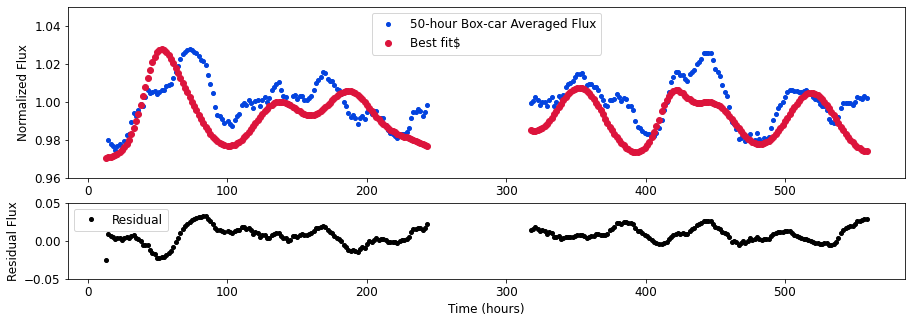

In [417]:
# Test
from sklearn.metrics import mean_squared_error, r2_score
print('Fitted parameters:')
display(Math('c={c:.4f}, \
              a0={a0:.4f}, T0={T0:.2f}, mu0={mu0:.2f}, fwhm0={fwhm0:.2f}\\ \
              a1={a1:.4f}, T1={T1:.2f}, mu1={mu1:.2f}, fwhm1={fwhm1:.2f}\\ \
              a2={a2:.4f}, T2={T2:.2f}, mu2={mu2:.2f}, fwhm2={fwhm2:.2f}\\ \
              a3={a3:.4f}, T3={T3:.2f}, mu3={mu3:.2f}, fwhm3={fwhm3:.2f}\\ \
              a4={a4:.4f}, T4={T4:.2f}, mu4={mu4:.2f}, fwhm4={fwhm4:.2f}'.format(**tpb)))

# x_data = time_orig
# y_data = lc_orig
# X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.4, random_state=42)

ypred = tpb['c'] + tpb['a0']*repeat_gaussian(X_test, T=tpb['T0'], mu=tpb['mu0'], fwhm=tpb['fwhm0']) + \
                   tpb['a1']*repeat_gaussian(X_test, T=tpb['T1'], mu=tpb['mu1'], fwhm=tpb['fwhm1']) + \
                   tpb['a2']*repeat_gaussian(X_test, T=tpb['T2'], mu=tpb['mu2'], fwhm=tpb['fwhm2']) + \
                   tpb['a3']*repeat_gaussian(X_test, T=tpb['T3'], mu=tpb['mu3'], fwhm=tpb['fwhm3']) + \
                   tpb['a4']*repeat_gaussian(X_test, T=tpb['T4'], mu=tpb['mu4'], fwhm=tpb['fwhm4'])
                                                            
y = tpb['c'] +  tpb['a0']*repeat_gaussian(x_data, T=tpb['T0'], mu=tpb['mu0'], fwhm=tpb['fwhm0']) + \
                tpb['a1']*repeat_gaussian(x_data, T=tpb['T1'], mu=tpb['mu1'], fwhm=tpb['fwhm1']) + \
                tpb['a2']*repeat_gaussian(x_data, T=tpb['T2'], mu=tpb['mu2'], fwhm=tpb['fwhm2']) + \
                tpb['a3']*repeat_gaussian(x_data, T=tpb['T3'], mu=tpb['mu3'], fwhm=tpb['fwhm3']) + \
                tpb['a4']*repeat_gaussian(x_data, T=tpb['T4'], mu=tpb['mu4'], fwhm=tpb['fwhm4'])

tpelist = [tpb[key] for key in tpb][1:]    

rmse = mean_squared_error(y_test,ypred)
r2 = r2_score(y_test,ypred)
print('mse:', rmse)
print('r2:',r2)

residual = y_data - y
                                                                              
txtsize = 12
headersize = 15
lw_data=2.5
lw_other=2.5
ms=4

backgroundcolor = 'xkcd:orange'
backgroundalpha = 0.1    
### Plotting
plt.close()
import matplotlib
matplotlib.rcParams.update({'font.size': 12})

f, (a0, a1) = plt.subplots(2, 1, figsize = (15,5), gridspec_kw={'height_ratios': [1.8, 0.8]})
a0.plot(x_data, y_data, label='%i-hour Box-car Averaged Flux'%rate, ls='', marker='o', ms=ms, c='xkcd:blue')
a0.plot(x_data, y, label=r'Best fit$', lw=lw_data, c='crimson', ls='', marker='o')
a0.set_ylim((0.96, 1.05))
a0.set_ylabel('Normalized Flux')
# a0.set_xlabel('Time (hours)')

a0.legend()
a1.plot(x_data, residual, label='Residual', ls='', marker='o', ms=4, c='k')
a1.legend()
a1.set_ylim((-0.05,0.05))
a1.set_xlabel('Time (hours)')
a1.set_ylabel('Residual Flux')
